In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stock-time-series-20050101-to-20171231/CAT_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231/UTX_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231/PFE_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231/PG_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231/UNH_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231/JNJ_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231/VZ_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231/AABA_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231/BA_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231/KO_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231/MCD_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231/MRK_

In [2]:
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Flatten
from keras import backend as K
import math

df_aapl = pd.read_csv('/kaggle/input/stock-time-series-20050101-to-20171231/AAPL_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
df_gogl = pd.read_csv('/kaggle/input/stock-time-series-20050101-to-20171231/GOOGL_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
df_msft = pd.read_csv('/kaggle/input/stock-time-series-20050101-to-20171231/MSFT_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
df_amzn = pd.read_csv('/kaggle/input/stock-time-series-20050101-to-20171231/AMZN_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])

df_all = [df_aapl, df_gogl, df_msft, df_amzn]

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [3]:
print("Starting file:")
print(df_aapl[:10])
print("Ending file:")
print(df_aapl[-10:])

print("Ending file gogl:")
print(df_gogl[-10:])

print("Ending file msft:")
print(df_msft[-10:])

print("Ending file amzn:")
print(df_amzn[-10:])

Starting file:
             Open   High    Low  Close     Volume  Name
Date                                                   
2006-01-03  10.34  10.68  10.32  10.68  201853036  AAPL
2006-01-04  10.73  10.85  10.64  10.71  155225609  AAPL
2006-01-05  10.69  10.70  10.54  10.63  112396081  AAPL
2006-01-06  10.75  10.96  10.65  10.90  176139334  AAPL
2006-01-09  10.96  11.03  10.82  10.86  168861224  AAPL
2006-01-10  10.89  11.70  10.83  11.55  570088246  AAPL
2006-01-11  11.98  12.11  11.80  11.99  373548882  AAPL
2006-01-12  12.14  12.34  11.95  12.04  320201966  AAPL
2006-01-13  12.14  12.29  12.09  12.23  194153393  AAPL
2006-01-17  12.24  12.34  11.98  12.10  209215265  AAPL
Ending file:
              Open    High     Low   Close    Volume  Name
Date                                                      
2017-12-15  173.63  174.17  172.46  173.97  40169307  AAPL
2017-12-18  174.88  177.20  174.86  176.42  29421114  AAPL
2017-12-19  174.99  175.39  174.09  174.54  27436447  AAPL
2017-

In [4]:
df_aapl.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3019.000000,3019.000000,3019.000000,3.019000e+03
mean,64.673309,65.256833,64.033445,64.662892,1.311457e+08
std,44.524927,44.811772,44.230829,44.536448,1.018560e+08
min,7.390000,7.560000,7.170000,7.240000,1.147592e+07
25%,23.425000,23.805000,23.015000,23.420000,5.292889e+07
50%,57.860000,58.460000,57.320000,57.920000,1.066271e+08
75%,99.165000,100.275000,98.385000,99.480000,1.798977e+08
max,175.110000,177.200000,174.860000,176.420000,8.432640e+08


In [5]:
df_aapl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3019 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3019 non-null   float64
 1   High    3019 non-null   float64
 2   Low     3019 non-null   float64
 3   Close   3019 non-null   float64
 4   Volume  3019 non-null   int64  
 5   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 165.1+ KB


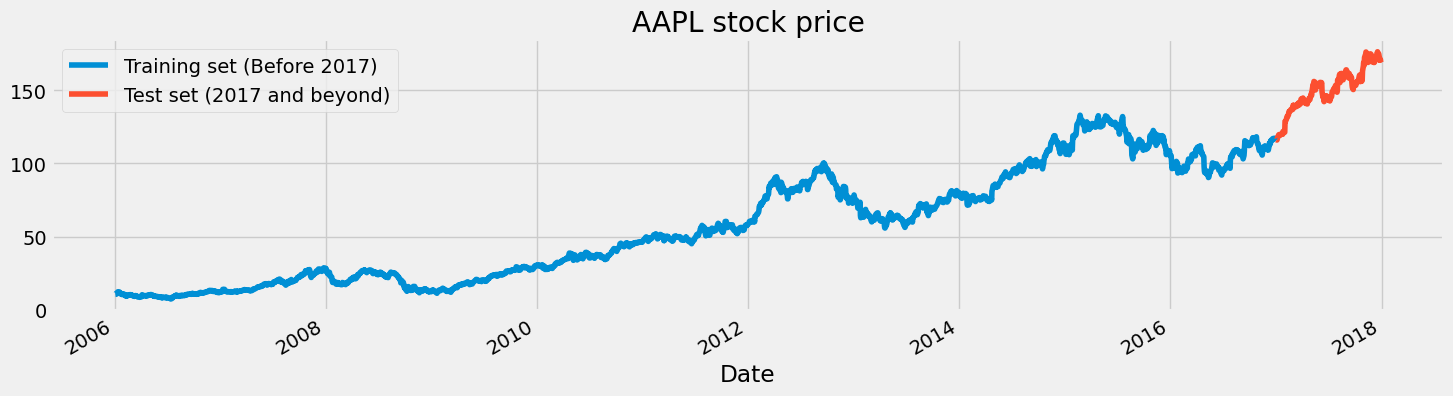

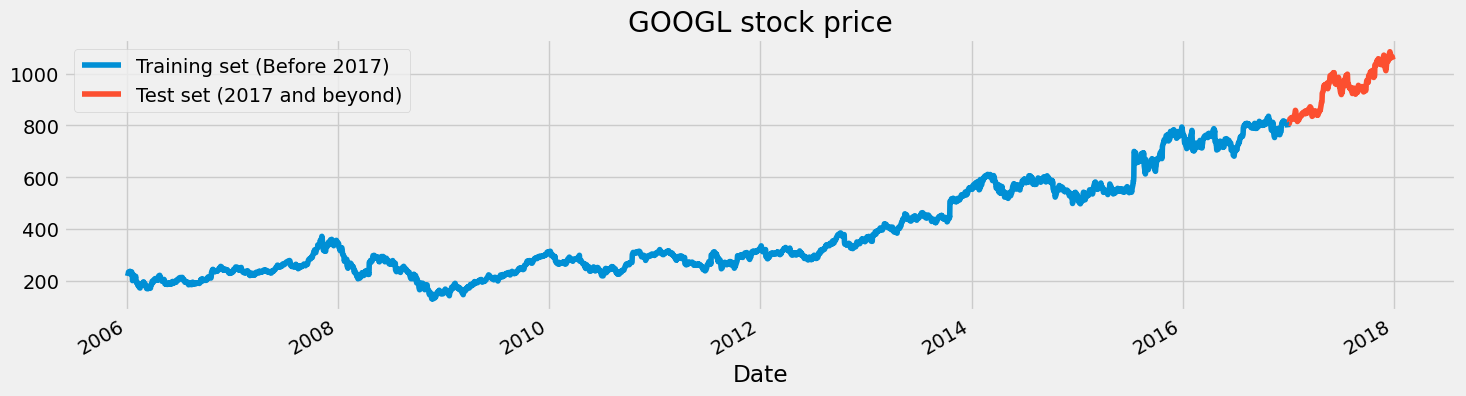

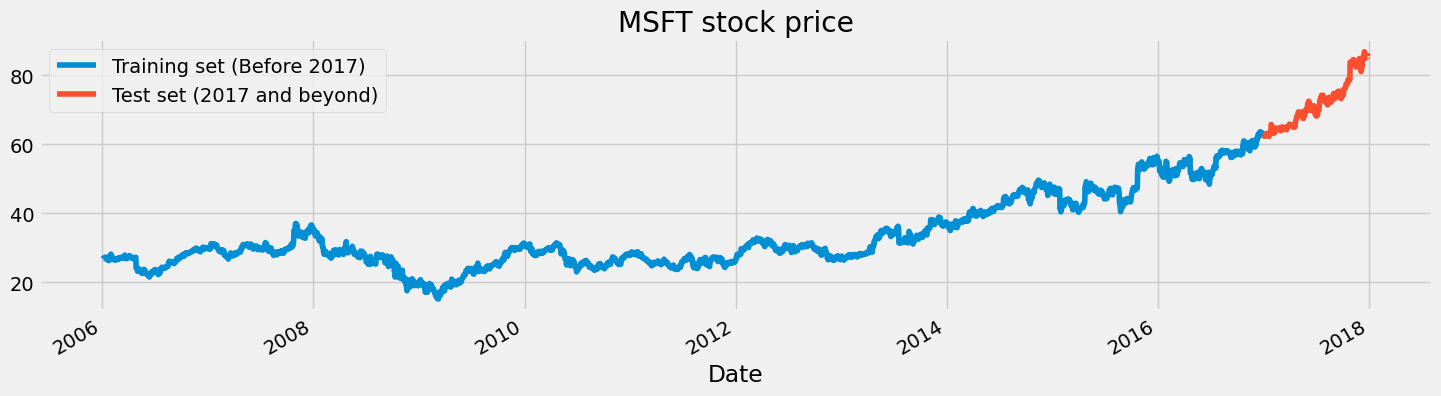

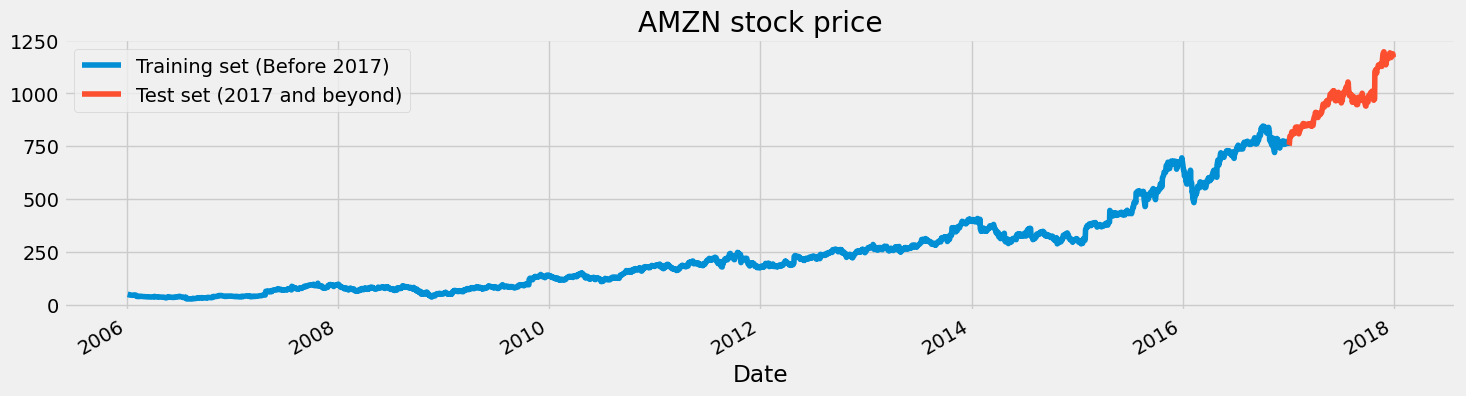

In [6]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

for df_company in df_all:
    df_company["Close"][:'2016'].plot(figsize=(16,4),legend=True)
    df_company["Close"]['2017':].plot(figsize=(16,4),legend=True)
    plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
    plt.title(f"{df_company.loc['2006-01-03']['Name']} stock price")
    plt.show()

In [7]:
training_set = []
test_set = []

for i, df_company in enumerate(df_all):
    training_set.append(df_company['Close'][:'2016'].values)
    test_set.append(df_company['Close']['2017':].values)

    training_set[i] = np.reshape(training_set[i], (-1, 1))
    test_set[i] = np.reshape(test_set[i], (-1, 1))

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_training = [scaler.fit_transform(company) for company in training_set]

scaled_training

[array([[0.02735369],
        [0.02759224],
        [0.02695611],
        ...,
        [0.87086514],
        [0.87062659],
        [0.86339059]]),
 array([[0.12587531],
        [0.1329627 ],
        [0.13722078],
        ...,
        [0.95590544],
        [0.95351469],
        [0.93875992]]),
 array([[0.24118011],
        [0.24386218],
        [0.24427481],
        ...,
        [0.98700227],
        [0.98514545],
        [0.96946565]]),
 array([[0.02628652],
        [0.02588324],
        [0.02637207],
        ...,
        [0.91173056],
        [0.90320058],
        [0.88452749]])]

In [9]:
timesteps = 8

x_train = []
y_train = []

for company_scaled_training in scaled_training:
    tmp_x = []
    tmp_y = []
    for i in range(timesteps, company_scaled_training.shape[0]):
        tmp_x.append(company_scaled_training[i-timesteps:i, 0])
        tmp_y.append(company_scaled_training[i,0])
    tmp_x, tmp_y = np.array(tmp_x), np.array(tmp_y)
    x_train.append(tmp_x)
    y_train.append(tmp_y)
    
print(x_train[1][0], y_train[1][0])
print(x_train[1][1], y_train[1][1])

[0.12587531 0.1329627  0.13722078 0.14742039 0.14829747 0.15032042
 0.15165019 0.1459916 ] 0.1478447849028845
[0.1329627  0.13722078 0.14742039 0.14829747 0.15032042 0.15165019
 0.1459916  0.14784478] 0.14845308322369816


In [10]:
print(x_train[0].shape, y_train[0].shape)
for i, x_train_curr in enumerate(x_train):
    x_train[i] = x_train_curr.reshape((x_train_curr.shape[0], x_train_curr.shape[1], 1))
    
print(x_train[0].shape, y_train[0].shape)
print(x_train[1].shape, y_train[1].shape)

(2760, 8) (2760,)
(2760, 8, 1) (2760,)
(2760, 8, 1) (2760,)


In [11]:
print(x_train[0].shape, y_train[0].shape)

for i, x_train_curr in enumerate(x_train):
    idx = np.random.permutation(len(x_train[i]))
    x_train[i] = x_train[i][idx]
    y_train[i] = y_train[i][idx]

(2760, 8, 1) (2760,)


In [12]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs
    
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation = "relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

In [13]:
def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="elu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(1, activation="linear")(x)
    return keras.Model(inputs, outputs)


In [14]:
def lr_scheduler(epoch, lr, warmup_epochs=30, decay_epochs=100, initial_lr=1e-6, base_lr=1e-3, min_lr=5e-5):
    if epoch <= warmup_epochs:
        pct = epoch / warmup_epochs
        return ((base_lr - initial_lr) * pct) + initial_lr

    if epoch > warmup_epochs and epoch < warmup_epochs+decay_epochs:
        pct = 1 - ((epoch - warmup_epochs) / decay_epochs)
        return ((base_lr - min_lr) * pct) + min_lr

    return min_lr

In [15]:
callbacks = [
            keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
            keras.callbacks.LearningRateScheduler(lr_scheduler)
            ]

In [16]:
input_shape = x_train[0].shape[1:]
print(input_shape)

(8, 1)


In [17]:
model = build_model(
    input_shape,
    head_size=46,
    num_heads=60,
    ff_dim=55,
    num_transformer_blocks=5,
    mlp_units=[256],
    mlp_dropout=0.4,
    dropout=0.14,
)

model.compile(
    loss="mean_squared_error",
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    metrics=["mean_squared_error"],
)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8, 1)]       0           []                               
                                                                                                  
 layer_normalization (LayerNorm  (None, 8, 1)        2           ['input_1[0][0]']                
 alization)                                                                                       
                                                                                                  
 multi_head_attention (MultiHea  (None, 8, 1)        19321       ['layer_normalization[0][0]',    
 dAttention)                                                      'layer_normalization[0][0]']    
                                                                                              

In [18]:
history = model.fit(
    x_train[0],
    y_train[0],
    validation_split=0.2,
    epochs=100,
    batch_size=20,
    callbacks=callbacks,
)

Epoch 1/100
111/111 [==============================] - 26s 28ms/step - loss: 0.2821 - mean_squared_error: 0.2821 - val_loss: 0.2516 - val_mean_squared_error: 0.2516 - lr: 1.0000e-06
Epoch 2/100
111/111 [==============================] - 3s 24ms/step - loss: 0.1446 - mean_squared_error: 0.1446 - val_loss: 0.0299 - val_mean_squared_error: 0.0299 - lr: 3.4300e-05
Epoch 3/100
111/111 [==============================] - 2s 21ms/step - loss: 0.0316 - mean_squared_error: 0.0316 - val_loss: 0.0043 - val_mean_squared_error: 0.0043 - lr: 6.7600e-05
Epoch 4/100
111/111 [==============================] - 2s 21ms/step - loss: 0.0132 - mean_squared_error: 0.0132 - val_loss: 0.0013 - val_mean_squared_error: 0.0013 - lr: 1.0090e-04
Epoch 5/100
111/111 [==============================] - 2s 22ms/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 3.0545e-04 - val_mean_squared_error: 3.0545e-04 - lr: 1.3420e-04
Epoch 6/100
111/111 [==============================] - 2s 21ms/step - loss: 0.0101 - m

In [19]:
from sklearn.metrics import mean_squared_error

# def shift(xs, n):
#     e = np.empty_like(xs)
#     if n >= 0:
#         e[:n] = np.nan
#         e[n:] = xs[:-n]
#     else:
#         e[n:] = np.nan
#         e[:n] = xs[-n:]
#     return e

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))
    return rmse

def plot_predictions(test,predicted,symbol):
    plt.plot(test, color='red',label=f'Real {symbol} Stock Price')
    plt.plot(predicted, color='blue',label=f'Predicted {symbol} Stock Price')
    plt.title(f'{symbol} Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel(f'{symbol} Stock Price')
    plt.legend()
    plt.show()

8/8 [==============================] - 1s 8ms/step


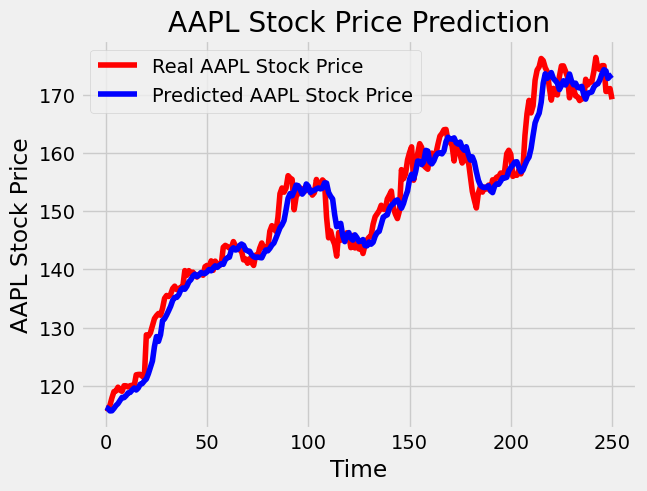

The root mean squared error is 2.934432287679395.


2.934432287679395

In [20]:
original = df_all[0]['Close']
inputs = original[((len(original)-len(test_set[0])) - timesteps):].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.fit_transform(inputs)

X_test = []
for i in range(timesteps, test_set[0].shape[0] + timesteps):
    X_test.append(inputs[i-timesteps:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

# print(test_set[0][-3],test_set[0][-2], test_set[0][-1])
# shifted_test_set = shift(test_set[0], 1)
# print(shifted_test_set[-3],shifted_test_set[-2], shifted_test_set[-1])

# print(predicted_stock_price[-1])
# prediction_error = test_set - predicted_stock_price

# plt.plot(history.history['loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['loss'], loc='upper left')
# plt.show()

plot_predictions(test_set[0],predicted_stock_price, "AAPL")
return_rmse(test_set[0],predicted_stock_price)

Epoch 1/100
111/111 [==============================] - 19s 26ms/step - loss: 0.3162 - mean_squared_error: 0.3162 - val_loss: 0.2569 - val_mean_squared_error: 0.2569 - lr: 1.0000e-06
Epoch 2/100
111/111 [==============================] - 2s 21ms/step - loss: 0.1977 - mean_squared_error: 0.1977 - val_loss: 0.1182 - val_mean_squared_error: 0.1182 - lr: 3.4300e-05
Epoch 3/100
111/111 [==============================] - 2s 22ms/step - loss: 0.0552 - mean_squared_error: 0.0552 - val_loss: 0.0081 - val_mean_squared_error: 0.0081 - lr: 6.7600e-05
Epoch 4/100
111/111 [==============================] - 2s 21ms/step - loss: 0.0137 - mean_squared_error: 0.0137 - val_loss: 5.0688e-04 - val_mean_squared_error: 5.0688e-04 - lr: 1.0090e-04
Epoch 5/100
111/111 [==============================] - 2s 21ms/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.0010 - val_mean_squared_error: 0.0010 - lr: 1.3420e-04
Epoch 6/100
111/111 [==============================] - 3s 26ms/step - loss: 0.0092 - m

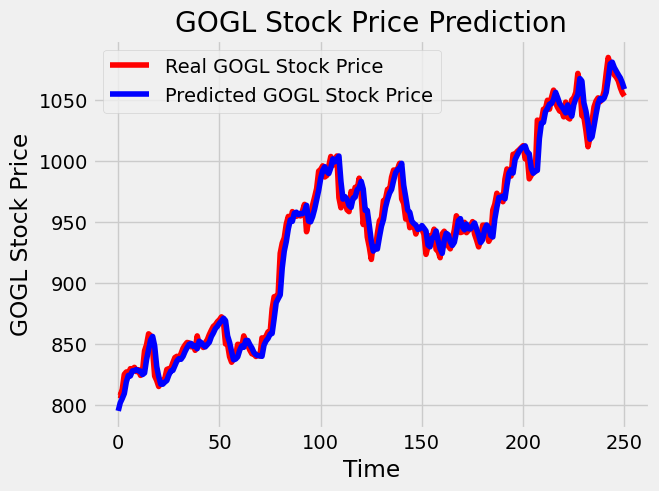

The root mean squared error is 10.128997074833523.


10.128997074833523

In [21]:
model2 = build_model(
    input_shape,
    head_size=46,
    num_heads=60,
    ff_dim=55,
    num_transformer_blocks=5,
    mlp_units=[256],
    mlp_dropout=0.4,
    dropout=0.14,
)

model2.compile(
    loss="mean_squared_error",
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    metrics=["mean_squared_error"],
)

history_gogl = model2.fit(
    x_train[1],
    y_train[1],
    validation_split=0.2,
    epochs=100,
    batch_size=20,
    callbacks=callbacks,
)

original_gogl = df_all[1]['Close']
inputs_gogl = original_gogl[((len(original_gogl)-len(test_set[1])) - timesteps):].values
inputs_gogl = inputs_gogl.reshape(-1,1)
inputs_gogl  = scaler.fit_transform(inputs_gogl)

X_test_gogl = []
for i in range(timesteps, test_set[1].shape[0] + timesteps):
    X_test_gogl.append(inputs_gogl[i-timesteps:i,0])
X_test_gogl = np.array(X_test_gogl)
X_test_gogl = np.reshape(X_test_gogl, (X_test_gogl.shape[0], X_test_gogl.shape[1], 1))
predicted_stock_price_gogl = model2.predict(X_test_gogl)
predicted_stock_price_gogl = scaler.inverse_transform(predicted_stock_price_gogl)

plot_predictions(test_set[1],predicted_stock_price_gogl, "GOGL")
return_rmse(test_set[1],predicted_stock_price_gogl)

Epoch 1/100
111/111 [==============================] - 20s 26ms/step - loss: 0.0550 - mean_squared_error: 0.0550 - val_loss: 0.0327 - val_mean_squared_error: 0.0327 - lr: 1.0000e-06
Epoch 2/100
111/111 [==============================] - 2s 22ms/step - loss: 0.0265 - mean_squared_error: 0.0265 - val_loss: 0.0024 - val_mean_squared_error: 0.0024 - lr: 3.4300e-05
Epoch 3/100
111/111 [==============================] - 2s 21ms/step - loss: 0.0130 - mean_squared_error: 0.0130 - val_loss: 8.3920e-04 - val_mean_squared_error: 8.3920e-04 - lr: 6.7600e-05
Epoch 4/100
111/111 [==============================] - 2s 21ms/step - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0013 - val_mean_squared_error: 0.0013 - lr: 1.0090e-04
Epoch 5/100
111/111 [==============================] - 2s 22ms/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 7.7487e-04 - val_mean_squared_error: 7.7487e-04 - lr: 1.3420e-04
Epoch 6/100
111/111 [==============================] - 3s 23ms/step - loss: 0.

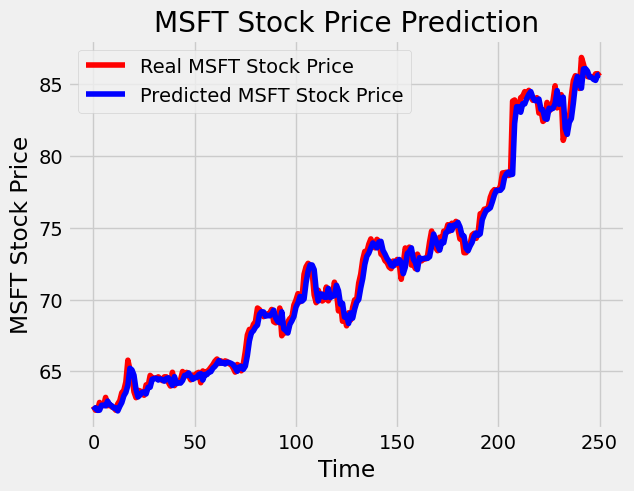

The root mean squared error is 0.7218934891918831.


0.7218934891918831

In [22]:
model3 = build_model(
    input_shape,
    head_size=46,
    num_heads=60,
    ff_dim=55,
    num_transformer_blocks=5,
    mlp_units=[256],
    mlp_dropout=0.4,
    dropout=0.14,
)

model3.compile(
    loss="mean_squared_error",
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    metrics=["mean_squared_error"],
)

history_msft = model3.fit(
    x_train[2],
    y_train[2],
    validation_split=0.2,
    epochs=100,
    batch_size=20,
    callbacks=callbacks,
)

original_msft = df_all[2]['Close']
inputs_msft = original_msft[((len(original_msft)-len(test_set[2])) - timesteps):].values
inputs_msft = inputs_msft.reshape(-1,1)
inputs_msft  = scaler.fit_transform(inputs_msft)

X_test_msft = []
for i in range(timesteps, test_set[2].shape[0] + timesteps):
    X_test_msft.append(inputs_msft[i-timesteps:i,0])
X_test_msft = np.array(X_test_msft)
X_test_msft = np.reshape(X_test_msft, (X_test_msft.shape[0], X_test_msft.shape[1], 1))
predicted_stock_price_msft = model3.predict(X_test_msft)
predicted_stock_price_msft = scaler.inverse_transform(predicted_stock_price_msft)

plot_predictions(test_set[2],predicted_stock_price_msft, "MSFT")
return_rmse(test_set[2],predicted_stock_price_msft)

Epoch 1/100
111/111 [==============================] - 19s 28ms/step - loss: 0.1902 - mean_squared_error: 0.1902 - val_loss: 0.1457 - val_mean_squared_error: 0.1457 - lr: 1.0000e-06
Epoch 2/100
111/111 [==============================] - 2s 22ms/step - loss: 0.1096 - mean_squared_error: 0.1096 - val_loss: 0.0420 - val_mean_squared_error: 0.0420 - lr: 3.4300e-05
Epoch 3/100
111/111 [==============================] - 2s 21ms/step - loss: 0.0267 - mean_squared_error: 0.0267 - val_loss: 0.0028 - val_mean_squared_error: 0.0028 - lr: 6.7600e-05
Epoch 4/100
111/111 [==============================] - 2s 21ms/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 3.6911e-04 - val_mean_squared_error: 3.6911e-04 - lr: 1.0090e-04
Epoch 5/100
111/111 [==============================] - 2s 21ms/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 5.6456e-04 - val_mean_squared_error: 5.6456e-04 - lr: 1.3420e-04
Epoch 6/100
111/111 [==============================] - 3s 23ms/step - loss: 0.

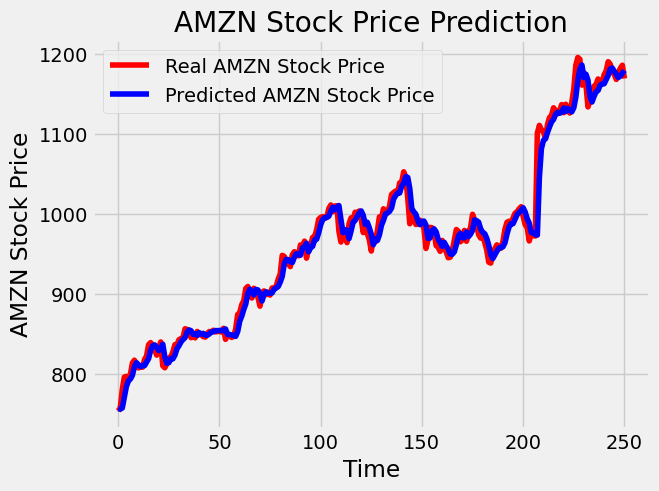

The root mean squared error is 14.621388917410492.


14.621388917410492

In [23]:
model4 = build_model(
    input_shape,
    head_size=46,
    num_heads=60,
    ff_dim=55,
    num_transformer_blocks=5,
    mlp_units=[256],
    mlp_dropout=0.4,
    dropout=0.14,
)

model4.compile(
    loss="mean_squared_error",
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    metrics=["mean_squared_error"],
)

history_msft = model4.fit(
    x_train[3],
    y_train[3],
    validation_split=0.2,
    epochs=100,
    batch_size=20,
    callbacks=callbacks,
)

original_amzn = df_all[3]['Close']
inputs_amzn = original_amzn[((len(original_amzn)-len(test_set[3])) - timesteps):].values
inputs_amzn = inputs_amzn.reshape(-1,1)
inputs_amzn  = scaler.fit_transform(inputs_amzn)

X_test_amzn = []
for i in range(timesteps, test_set[3].shape[0] + timesteps):
    X_test_amzn.append(inputs_amzn[i-timesteps:i,0])
X_test_amzn = np.array(X_test_amzn)
X_test_amzn = np.reshape(X_test_amzn, (X_test_amzn.shape[0], X_test_amzn.shape[1], 1))
predicted_stock_price_amzn = model4.predict(X_test_amzn)
predicted_stock_price_amzn = scaler.inverse_transform(predicted_stock_price_amzn)

plot_predictions(test_set[3],predicted_stock_price_amzn, "AMZN")
return_rmse(test_set[3],predicted_stock_price_amzn)